In [1]:
from typing import List
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
num_friends = [100,49,41,40,25,41,41,41,41,41,41,41]

In [3]:
friend_counts = Counter(num_friends)
friend_counts

Counter({100: 1, 49: 1, 41: 8, 40: 1, 25: 1})

In [4]:
type(friend_counts)

collections.Counter

In [5]:
friend_counts[100]

1

In [6]:
friend_counts[49]

1

In [7]:
friend_counts[41]

8

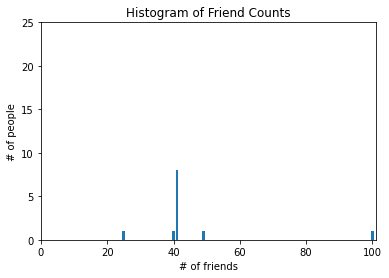

In [8]:
friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs,ys)
plt.axis([0,101,0,25])
plt.title('Histogram of Friend Counts')
plt.xlabel('# of friends')
plt.ylabel('# of people')
plt.show()

In [9]:
num_points = len(num_friends)
num_points

12

In [10]:
largest_value = max(num_friends)
largest_value

100

In [11]:
smallest_value = min(num_friends)
smallest_value

25

In [12]:
sorted_values = sorted(num_friends)
sorted_values

[25, 40, 41, 41, 41, 41, 41, 41, 41, 41, 49, 100]

In [13]:
smallest_value = sorted_values[0]
smallest_value

25

In [14]:
second_smallest_value = sorted_values[1]
second_smallest_value

40

In [15]:
second_largest_value = sorted_values[-2]
second_largest_value

49

In [16]:
def mean(xs:List[float]) -> float:
    return sum(xs) / len(xs)
mean(num_friends)

45.166666666666664

In [17]:
def _median_odd(xs: List[float]) -> float:
    '''If len(xs) is odd, the median is the middle element'''
    return sorted(xs)[len(xs) // 2]

In [18]:
def _median_even(xs: List[float]) -> float:
    '''If len(xs) is even, it is the average of the middle two elements'''
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2 # e.g. length 4 -> hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

In [19]:
def median(v: List[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

In [20]:
assert median([1,10,2,9,5]) == 5
assert median([1,9,2,10]) == (2 + 9) / 2

In [21]:
print(median(num_friends))

41.0


In [22]:
def quantile(xs: List[float], p:float) -> float:
    """Return the pth-percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

In [23]:
list1 = [1,2,3,4,5,6,7,8,9,10,10]

In [24]:
sorted(list1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10]

In [25]:
sorted(list1)[1]

2

In [26]:
quantile(list1, 0.1)

2

In [27]:
quantile(list1, 0.2)

3

In [28]:
quantile(num_friends,0.5)

41

In [29]:
def mode(x:List[float]) -> List[float]:
    '''Returns a list, since there might be more than one mode'''
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

In [30]:
mode(num_friends)

[41]

In [31]:
mode(list1)

[10]

In [32]:
set(mode(list1))

{10}

In [33]:
Counter(list1)

Counter({1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 2})

In [34]:
Counter(list1).values()

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [35]:
Counter(list1).keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [36]:
# "range" already means something in Python, so we'll use a different name
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

In [37]:
data_range(list1)

9

In [38]:
from typing import List
Vector = List[float]
height_weight_age = [70,170,40]
grades = [95,80,75,62]

In [39]:
def add(v:Vector, w:Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"
    return [v_i + w_i for v_i, w_i in zip(v,w)]

In [40]:
assert add([1,2,3],[4,5,6]) == [5,7,9]

In [41]:
def subtract(v:Vector, w:Vector):
    assert len(v) == len(w), "vector must be the same length"
    return [v_i - w_i for v_i, w_i in zip(v,w)]

In [42]:
assert subtract([3,3,3],[1,2,3]) == [2,1,0]

In [43]:
def vector_sum(vectors: List[Vector]):
    assert vectors, "no vectors provided"
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"
    return [sum(vector[i] for vector in vectors)
           for i in range(num_elements)]

In [44]:
assert vector_sum([[1,2,3],[4,5,6],[7,8,9]]) == [12,15,18]

In [45]:
def scalar_multiply(c:float,v:Vector):
    return [c * v_i for v_i in v]

In [46]:
assert scalar_multiply(3,[1,2,3]) == [3,6,9]

In [47]:
def vector_mean(vectors: List[Vector]):
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [48]:
assert vector_mean([[1,2,3],[4,5,6],[7,8,9]]) == [4.0, 5.0, 6.0]

In [49]:
def dot(v:Vector, w:Vector):
    assert len(v) == len(w), "vectors must be same length"
    return sum(v_i * w_i for v_i, w_i in zip(v,w))

In [50]:
dot([1,2,3],[4,5,6])

32

In [51]:
1*4+2*5+3*6

32

In [52]:
def sum_of_squares(v:Vector):
    return dot(v,v)

In [53]:
assert sum_of_squares([2,3,4]) == 29

In [54]:
def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

In [55]:
def variance(xs:List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

In [56]:
list2 = [5,7,1,2,4]
assert variance(list2) == 5.7

In [57]:
import math
def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

In [58]:
standard_deviation(list2)

2.3874672772626644

In [59]:
standard_deviation.__annotations__

{'xs': typing.List[float], 'return': float}

In [60]:
def interquartile_range(xs: List[float]) -> float:
    """Returns the difference between the 75%-ile and the 25%-ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

In [61]:
interquartile_range(list2)

3

In [62]:
def covariance(xs:List[float], ys:List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

In [63]:
x = [2,3,4,5,6,7]
y = [6,7.5,8,12,13,15.5]

In [64]:
sxy = covariance(x,y)
sxy

6.8

In [65]:
sx = standard_deviation(x)
sx

1.8708286933869707

In [66]:
sy = standard_deviation(y)
sy

3.710345895825168

In [67]:
mean(x)

4.5

In [68]:
mean(y)

10.333333333333334

In [69]:
r = sxy / (sx*sy)
r

0.9796264262312437

In [70]:
b = r*(sy/sx)
b

1.942857142857143

In [71]:
import numpy as np

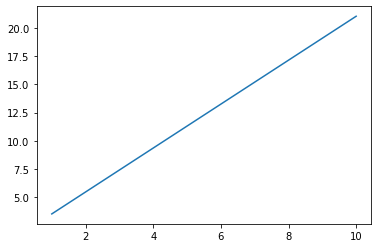

In [72]:
x = np.arange(1,10,0.001)
plt.plot(x,1.590+1.943*x)

In [73]:
def correlation(xs:List[float],ys:List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero  

In [74]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [75]:
outlier = num_friends.index(100)
outlier

0

In [76]:
list = [2,4,1,6,8]
list.index(6)

3

In [77]:
list.index(8)

4

In [78]:
for i,x in enumerate(list):
    print(i,x)

0 2
1 4
2 1
3 6
4 8


In [79]:
num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]

In [80]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [81]:
daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier]

In [82]:
daily_hours_good = [dm / 60 for dm in daily_minutes_good]

In [83]:
correlation(num_friends_good,daily_minutes_good)

0.5736792115665573

In [84]:
assert 0.57 < correlation(num_friends_good,daily_hours_good) < 0.58

(0.0, 100.0)

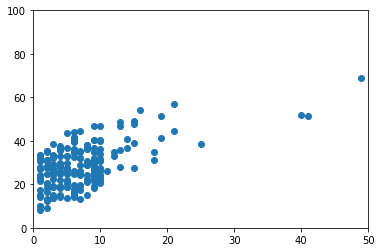

In [85]:
# plt.scatter(daily_minutes_good,num_friends_good)
plt.scatter(num_friends_good,daily_minutes_good)
plt.xlim(0,50)
plt.ylim(0,100)

(0.0, 100.0)

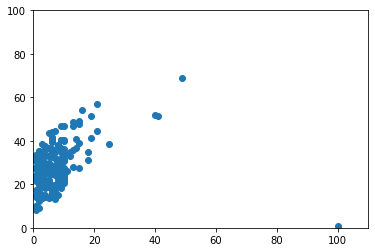

In [86]:
plt.scatter(num_friends,daily_minutes)
plt.xlim(0,110)
plt.ylim(0,100)

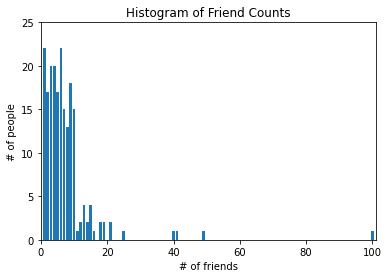

In [87]:
friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs,ys)
plt.axis([0,101,0,25])
plt.title('Histogram of Friend Counts')
plt.xlabel('# of friends')
plt.ylabel('# of people')
plt.show()

In [88]:
x = [-2,-1,0,1,2]
y = [2,1,0,1,2]

In [89]:
covariance(x,y)

0.0

In [90]:
correlation(x,y)

0.0

In [91]:
x = [-2,-1,0,1,2]
y = [99.98,99.99,100,100.01,100.02]

In [92]:
covariance(x,y)

0.02499999999999858

In [93]:
correlation(x,y)

1.0

In [94]:
import enum, random

In [95]:
# An Enum is a typed set of enumerated values. We can use them
# to make our code more descriptive and readable
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1
def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

In [96]:
both_girls = 0
older_girl = 0
either_girl = 0
random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1

print("P(both | older):", both_girls / older_girl)
print("P(both | either):", both_girls / either_girl)

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


In [97]:
def uniform_pdf(x:float) -> float:
    return 1 if 0 <= x < 1 else 0

In [98]:
def uniform_cdf(x:float) -> float:
    """Returns the probability that a uniform random variable is <= x"""
    if x < 0: return 0
    elif x < 1: return x
    else: return 1

In [99]:
import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x:float, mu:float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / 
            (SQRT_TWO_PI * sigma))

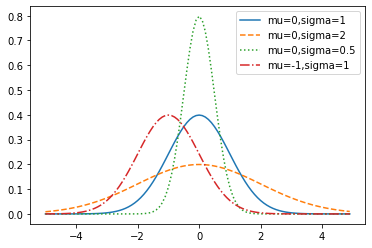

In [100]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
# plt.legend(loc='lower right')
plt.legend()

In [101]:
def normal_cdf(x:float,mu:float=0,sigma:float=1) -> float:
    return (1+math.erf((x-mu) / math.sqrt(2) / sigma)) / 2

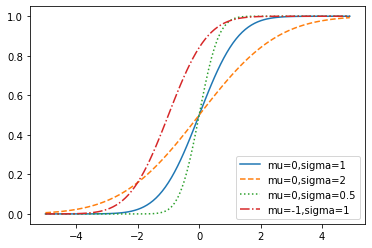

In [102]:
xs = [x / 10.0 for x in range(-50,50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4)

In [103]:
def inverse_normal_cdf(p:float,
                       mu:float=0,
                       sigma:float=1,
                       tolerance:float=0.00001) -> float:
    """Find approximate inverse using binary search"""
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerace)
    low_z = -10.0
    hi_z = 10.0
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z = mid_z
        else:
            hi_z = mid_z
    return mid_z

In [104]:
import scipy.stats as st

In [105]:
list = [2.19,2.19,2.39,2.19,2.24,2.39,2.27,2.29,2.17,2.29,2.30,2.29]

In [106]:
standard_deviation(list)

0.07438637868140471

In [107]:
variance(list)

0.0055333333333333415

In [108]:
np.std(list)

0.07121953539740504

In [110]:
x1 = [1360,1940,1750,1550,1790,1750,2230,1600,1450,1870,2210,1480]
y1 = [278.5,375.7,329.5,329.8,295.6,310.3,460.5,305.2,288.6,365.7,425.3,268.8]

In [114]:
r = correlation(x1,y1)
r

0.9235700667986808

In [112]:
sx = standard_deviation(x1)
sx

281.48416178061126

In [113]:
sy = standard_deviation(y1)
sy

59.790210889256926

In [115]:
b = r*(sy/sx)
b

0.1961760431407045

In [120]:
y_mean = np.mean(y1)
y_mean

336.12500000000006

In [121]:
x_mean = np.mean(x1)
x_mean

1748.3333333333333

In [123]:
a = y_mean - b*x_mean
a

-6.85611542433162

In [ ]:
y = -6.856 + 0.196*x